In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pandas_datareader as data
from pandas_datareader import data as pdr

import yfinance as yf
yf.pdr_override() # <== that's all it takes :-)




In [9]:
start = "2010-01-01"
end = "2023-07-30"

df = pdr.get_data_yahoo("SPY", start, end)
df.head

[*********************100%***********************]  1 of 1 completed


<bound method NDFrame.head of                   Open        High         Low       Close   Adj Close  \
Date                                                                     
2010-01-04  112.370003  113.389999  111.510002  113.330002   87.791779   
2010-01-05  113.260002  113.680000  112.849998  113.629997   88.024193   
2010-01-06  113.519997  113.989998  113.430000  113.709999   88.086159   
2010-01-07  113.500000  114.330002  113.180000  114.190002   88.457970   
2010-01-08  113.889999  114.620003  113.660004  114.570000   88.752357   
...                ...         ...         ...         ...         ...   
2023-07-24  453.369995  455.040009  452.299988  454.200012  454.200012   
2023-07-25  453.920013  456.739990  453.869995  455.440002  455.440002   
2023-07-26  454.470001  456.989990  453.380005  455.510010  455.510010   
2023-07-27  459.019989  459.440002  451.549988  452.489990  452.489990   
2023-07-28  455.880005  457.779999  452.489990  456.920013  456.920013   

       

In [11]:
df = df.reset_index()
df.head


<bound method NDFrame.head of       index       Date        Open        High         Low       Close  \
0         0 2010-01-04  112.370003  113.389999  111.510002  113.330002   
1         1 2010-01-05  113.260002  113.680000  112.849998  113.629997   
2         2 2010-01-06  113.519997  113.989998  113.430000  113.709999   
3         3 2010-01-07  113.500000  114.330002  113.180000  114.190002   
4         4 2010-01-08  113.889999  114.620003  113.660004  114.570000   
...     ...        ...         ...         ...         ...         ...   
3410   3410 2023-07-24  453.369995  455.040009  452.299988  454.200012   
3411   3411 2023-07-25  453.920013  456.739990  453.869995  455.440002   
3412   3412 2023-07-26  454.470001  456.989990  453.380005  455.510010   
3413   3413 2023-07-27  459.019989  459.440002  451.549988  452.489990   
3414   3414 2023-07-28  455.880005  457.779999  452.489990  456.920013   

       Adj Close     Volume  
0      87.791779  118944600  
1      88.024193  111

In [16]:
df=df.drop(['Volume'],axis=1)
df.head

KeyError: "['Volume'] not found in axis"

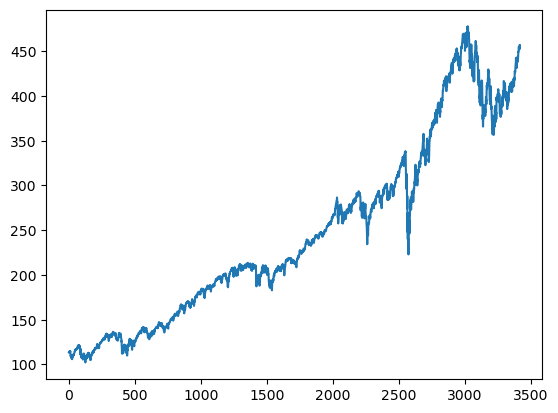

In [18]:
plt.plot(df.Close)

In [20]:
ma100=df.Close.rolling(100).mean()
ma100.head()

0   NaN
1   NaN
2   NaN
3   NaN
4   NaN
Name: Close, dtype: float64

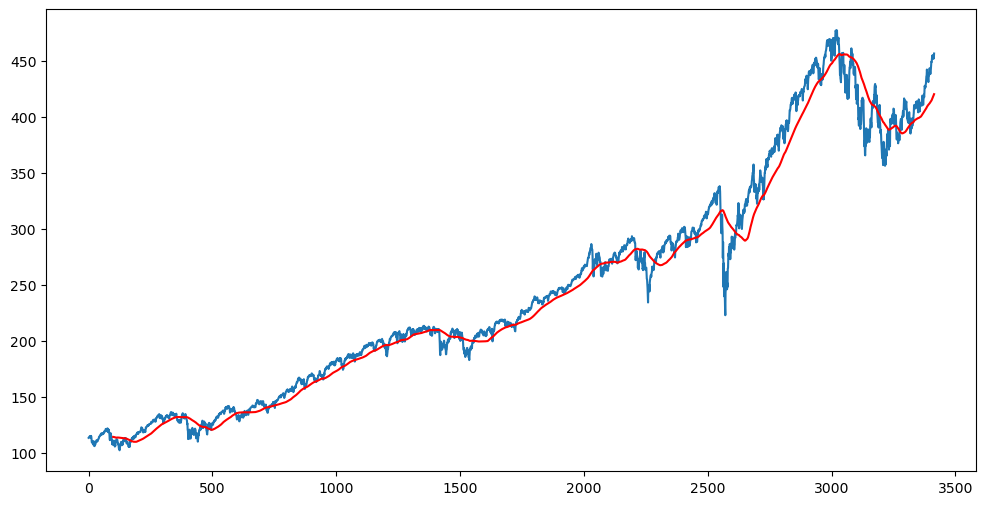

In [22]:
plt.figure(figsize = (12,6))
plt.plot(df.Close)
plt.plot(ma100,'r')

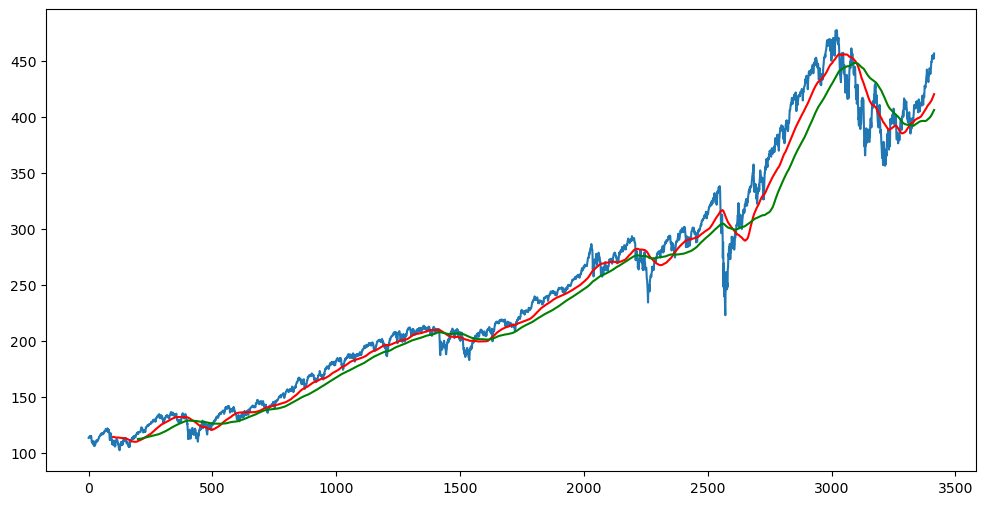

In [23]:
ma200=df.Close.rolling(200).mean()
ma200.head()


plt.figure(figsize = (12,6))
plt.plot(df.Close)
plt.plot(ma100,'r')
plt.plot(ma200,'g')


In [25]:
df.shape


(3415, 5)

In [29]:
#Splitting data into training and testing

data_training = pd.DataFrame(df['Close'][0:int (len(df)*0.70)])
data_testing = pd.DataFrame(df['Close'][int(len(df)*0.70):int(len(df))])

print(data_training.head())
print(data_testing.head())

        Close
0  113.330002
1  113.629997
2  113.709999
3  114.190002
4  114.570000
           Close
2390  298.799988
2391  298.459991
2392  296.820007
2393  297.190002
2394  298.609985


In [31]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))


In [36]:
data_training_array=scaler.fit_transform(data_training)
data_training_array



(2390, 1)

In [45]:
x_train=[]
y_train=[]


for i in range(100,data_training_array.shape[0]):
    x_train.append(data_training_array[i-100:i])
    y_train.append(data_training_array[i,0])
    

x_train,y_train=np.array(x_train),np.array(y_train)
    


In [46]:
x_train.shape

(2290, 100, 1)

In [41]:
#ML MODEL

In [44]:
from keras.layers import Dense,Dropout,LSTM
from keras.models import Sequential

In [52]:
model = Sequential()
model.add(LSTM(units = 50,activation ='relu',return_sequences = True,input_shape=(x_train.shape[1],1)))
model.add(Dropout(0.2))


model.add(LSTM(units = 60,activation ='relu',return_sequences = True))
            
model.add(Dropout(0.3))



model.add(LSTM(units = 80,activation ='relu',return_sequences = True))
             
model.add(Dropout(0.4))



model.add(LSTM(units = 120,activation ='relu'))
model.add(Dropout(0.5))
               
               
model.add(Dense(units=1))

In [54]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_9 (LSTM)               (None, 100, 50)           10400     
                                                                 
 dropout_8 (Dropout)         (None, 100, 50)           0         
                                                                 
 lstm_10 (LSTM)              (None, 100, 60)           26640     
                                                                 
 dropout_9 (Dropout)         (None, 100, 60)           0         
                                                                 
 lstm_11 (LSTM)              (None, 100, 80)           45120     
                                                                 
 dropout_10 (Dropout)        (None, 100, 80)           0         
                                                                 
 lstm_12 (LSTM)              (None, 120)              

In [55]:
model.compile(optimizer='adam',loss='mean_squared_error')
model.fit(x_train,y_train,epochs=100)

Epoch 1/100
72/72 [==============================] - 20s 186ms/step - loss: 0.0468
Epoch 2/100
72/72 [==============================] - 12s 169ms/step - loss: 0.0078
Epoch 3/100
72/72 [==============================] - 12s 169ms/step - loss: 0.0071
Epoch 4/100
72/72 [==============================] - 12s 169ms/step - loss: 0.0061
Epoch 5/100
72/72 [==============================] - 12s 169ms/step - loss: 0.0060
Epoch 6/100
72/72 [==============================] - 12s 167ms/step - loss: 0.0051
Epoch 7/100
72/72 [==============================] - 12s 170ms/step - loss: 0.0050
Epoch 8/100
72/72 [==============================] - 12s 170ms/step - loss: 0.0056
Epoch 9/100
72/72 [==============================] - 12s 171ms/step - loss: 0.0050
Epoch 10/100
72/72 [==============================] - 12s 170ms/step - loss: 0.0053
Epoch 11/100
72/72 [==============================] - 12s 169ms/step - loss: 0.0046
Epoch 12/100
72/72 [==============================] - 12s 169ms/step - loss: 0.0047
E

72/72 [==============================] - 12s 172ms/step - loss: 0.0021
Epoch 99/100
72/72 [==============================] - 12s 172ms/step - loss: 0.0019
Epoch 100/100
72/72 [==============================] - 12s 172ms/step - loss: 0.0021


In [57]:
model.save('Trial4kera_model.keras')

In [60]:
data_testing.head()

,Close
2390,298.799988
2391,298.459991
2392,296.820007
2393,297.190002
2394,298.609985


In [62]:
past_100_days = data_training.tail(100)

In [66]:
final_df=past_100_days.append(data_testing,ignore_index=True)

C:\Users\Admin\AppData\Local\Temp\ipykernel_7396\3595571042.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  final_df=past_100_days.append(data_testing,ignore_index=True)


In [69]:
final_df.head()

,Close
0,270.470001
1,270.619995
2,274.100006
3,274.989990
4,274.380005


In [72]:
input_data = scaler.fit_transform(final_df)

In [74]:
input_data.shape

(1125, 1)

In [77]:
x_test=[]
y_test=[]

for i in range(100,input_data.shape[0]):
    x_test.append(input_data[i-100:i])
    y_test.append(input_data[i,0])
    
    
    
    

In [79]:
x_test,y_test=np.array(x_test),np.array(y_test)



In [85]:
print(x_test.shape,y_test.shape)

(1025, 100, 1) (1025,)


In [86]:
y_predicted =model.predict(x_test)

33/33 [==============================] - 3s 66ms/step


In [88]:
y_predicted.shape

(1025, 1)

In [91]:
y_predicted

array([[0.3308768 ],
       [0.33266687],
       [0.33453953],
       ...,
       [0.8819355 ],
       [0.8845525 ],
       [0.88629687]], dtype=float32)

In [93]:
scaler.scale_

array([0.00392526])

In [95]:
scale_factor =1/0.00392526
y_predicted = y_predicted*scale_factor
y_test = y_test*scale_factor

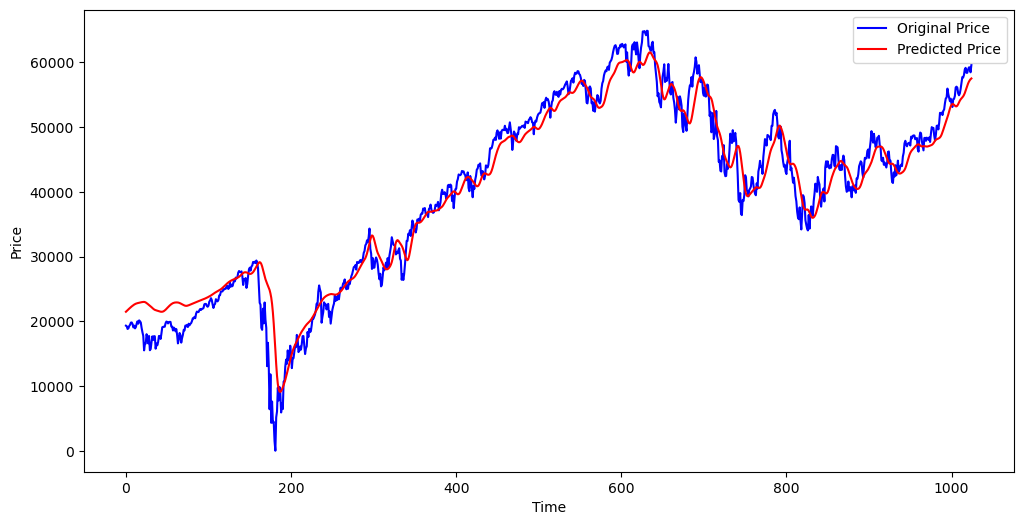

In [98]:
plt.figure(figsize=(12,6))
plt.plot(y_test,'b',label='Original Price')
plt.plot(y_predicted,'r',label='Predicted Price')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()